# Task 4 
Hamiltonian (H):
$$ H = \begin{vmatrix}
1 & 0 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & 0 & 1
\end{vmatrix} $$



## Variational quantum eigensolver

It works on variational principal which say if we have a Hamiltonian H with eigenstates and associated eigenvalues . Then the following relation holds: $$ H |\psi⟩ = \lambda|\psi⟩$$ 
where λ is energy value for given state |ψ⟩. for every different |ψ⟩ we can find its energy, but for only one 
|ψ⟩ there exist λ which is smallest of all, and we call that |ψ⟩ as groung state of the system. and VQE helps us to find groung state of any given system. to make process simpler it decompose Hamiltonians into Pauli-Matrices.  [Resourse](https://www.mustythoughts.com/variational-quantum-eigensolver-explained)

![Variational quantum eigensolver single qubit(VQE)](vqe.png)   


VQE can be some up in three parts 
1. Decomposition
2. Circuit
    - Ansatz
    - Initializing mesurement basis
3. Measurement
 

## Part 1 : Decomposition 
###### Decomposing Two-Qubit Hamiltonians into Pauli-Matrices   

Pauli-Matrices form a basis for the real vector space of 2 × 2 Hermitian matrices. This means that any 2 × 2 Hermitian matrix can be written in a unique way as a linear combination of Pauli matrices, with all coefficients being real numbers. these Pauli terms (σ1, σx, σy, σz) tells us in which basis we should measure our qubits, and their coefficient tell us by how much factor we should consider their expactation values in the end.        

For a two qubit Hamiltonian or 4 × 4 Hermitian matrices

$$ H = \sum_{i,j=1,x,y,z} a_{i,j}(σ_{i}\otimesσ_{j})  $$
Where, $$ a_{i,j} = \frac{1}{4} tr[(σ_{i}\otimesσ_{j}) H ] $$

Given Hermitian matrix H can be written as 

$$ H = \begin{vmatrix}
1 & 0 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & 0 & 1
\end{vmatrix}  =  \frac{1}{2} (σ_{1}\otimesσ_{1}) -  \frac{1}{2} (σ_{x}\otimesσ_{x}) - \frac{1}{2} (σ_{y}\otimesσ_{y}) + \frac{1}{2} (σ_{z}\otimesσ_{z})  $$



## Part 2 : Circuit

Once we have the decomposition of Hamiltonian, we can creat circuits for each term in decomposition.     
Circuit mainly consists of Ansatz, it prepares the state we need to get meassurements. we will find the Ansatz by trial and error.        
since QC always meassures in Z basis, we need to Initializing mesurement basis, in our Two-Qubit Hamiltonian H, we have four terms from decomposition $$(σ_{1}\otimesσ_{1}), (σ_{x}\otimesσ_{x}), (σ_{y}\otimesσ_{y}), σ_{z}\otimesσ_{z})$$ with coefficents $$ \frac{1}{2}, -\frac{1}{2},  -\frac{1}{2},  \frac{1}{2}$$ respectively.

if we have first term $$(σ_{1}\otimesσ_{1})$$ it represent identity opration on both first and second qubit, since it's identity opration so we don't need any circuit for this, we just need to take it's coefficient in account in final sumation.  
Second term $$(σ_{x}\otimesσ_{x})$$  have σx opration on both qubits, so to do a measurement along X basis, we need to rotate Bhoch sphere around Y axis by -π/2 degree for qubits. 
simillary for third term $$(σ_{y}\otimesσ_{y})$$ we will rotate  Bloch sphere by π/2 degree around X axis for both qubits to make measurements along Y Basis.
measurement along Z axis does not need any ratation since QC always meassures in Z basis. so fourth term $$σ_{z}\otimesσ_{z})$$ will only consist of Ansatz.

In [229]:
## imports 
import qiskit 
from qiskit import *
from qiskit import execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
import numpy as np
import matplotlib as plt
pi = np.pi

### Ansatz  

In [239]:
#ansatz
def ansatz(circuit,parameter):
    circuit.ry(parameter,0)
    circuit.cx(0,1)
    circuit.h(0)
    circuit.h(1)

    return circuit

looking into ansatz circuit:

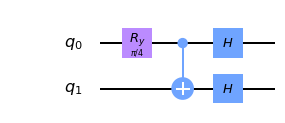

In [240]:
q  = 2
parameter = pi/4
circuit = QuantumCircuit(q)
ansatz(circuit,parameter)
circuit.draw('mpl')

creating citcuits for each terms of hamiltonian decomposition 
### Second Terms$$(σ_{x}\otimesσ_{x})$$ :  Circuit 1

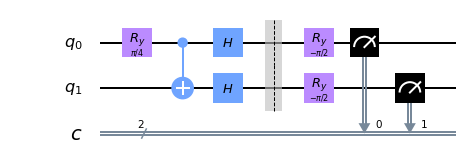

In [221]:
# circuit 1 (for XX )
q , c = 2, 2
parameter = pi/4
circuit = QuantumCircuit(q, c)
ansatz(circuit,parameter)
circuit.barrier()
circuit.ry(-pi/2,0)
circuit.ry(-pi/2,1)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw('mpl')

function for XX term

In [222]:
#circuit 1 for XX terms
def circuit_1(q,c,parameter):
    circuit = QuantumCircuit(q, c)
    ansatz(circuit,parameter)
    circuit.ry(-pi/2,0)
    circuit.ry(-pi/2,1)
    circuit.measure(0,0)
    circuit.measure(1,1)
    output = expectation_value(circuit)
    return output


### Third Term $$(σ_{y}\otimesσ_{y})$$: Circuit 2   

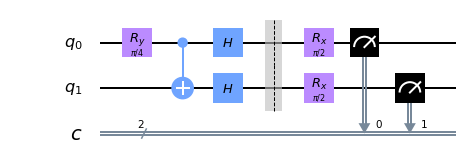

In [223]:
# circuit 2 (for YY )
q , c = 2, 2
parameter = pi/4
circuit = QuantumCircuit(q, c)
ansatz(circuit,parameter)
circuit.barrier()
circuit.rx(pi/2,0)
circuit.rx(pi/2,1)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw('mpl')

In [205]:
#circuit 2 for YY
def circuit_2(q,c,parameter):
    circuit = QuantumCircuit(q, c)
    ansatz(circuit,parameter)
    circuit.rx(pi/2,0)
    circuit.rx(pi/2,1)
    circuit.measure(0,0)
    circuit.measure(1,1)
    output = expectation_value(circuit)
    return output

### Fourth Terms $$(σ_{z}\otimesσ_{z})$$: Circuit 3

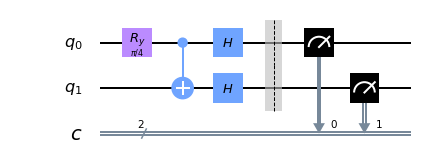

In [224]:
# circuit 2 (for ZZ )
q , c = 2, 2
parameter = pi/4
circuit = QuantumCircuit(q, c)
ansatz(circuit,parameter)
circuit.barrier()
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw('mpl')

In [225]:
#circuit 3 for ZZ
def circuit_3(q,c,parameter):
    circuit = QuantumCircuit(q, c)
    ansatz(circuit,parameter)
    circuit.measure(0,0)
    circuit.measure(1,1)
    output = expectation_value(circuit)
    return output


## Part 3: Measurements

Now for measurement we will find expactation values for each circuit. 
Measurement of each circuit will consist probabilities of four terms |00>, |01>, |10>, |11>. for single qubit we consider eigenvalues of measurements, if we found our system in |0> state in measurement then we take it as 1, and if it's in |1> then we take it as -1, wince those are their eigenvalues.
But for two qubit measurements, if our measurements is |01> means first qubit collapse in 0 state and second in 1 state, then we take multiplication of their eigenvalues 1 x -1 = -1 we can take it as a sign,similarly we can do for other measurements.        

|  measurement | Sign | 
|--------------|:------------|
|  \|00>        |      1     | 
|  \|01>        |      -1     |  
|  \|10>        |      -1     |  
|  \|11>        |       1     |

we can calculate then ecpeactation value as $$\sum (sign) . (P) $$ where P is prbability of measurement 
once we have expactation values of each circuit we then add them together with their respective coefficents which we got from decomposition step to calculate final eigenvalue.  

for given H and from it decomposition we can get eigenvalue as
$$ Eigenvalue 

In [226]:
def expectation_value(circuit):
    
    shots = 1000
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(circuit, backend, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    expectation_val = 0
    for measure_result in  counts:
        sign = +1
        if measure_result == '00':
            sign = +1
        if measure_result == '01':
            sign = -1
        if measure_result == '10':
            sign = -1
        if measure_result == '11':
            sign = +1
        expectation_val += sign * ((counts[measure_result] / shots ) )
    return expectation_val 


## VQE Algorithm

In [241]:
energy_estimates = []
read_1_list = []
read_2_list = []
read_3_list = []

q,c = 2,2
parameters1 = np.linspace(0, 2*pi, 100)   #theta

for parameter1 in parameters1:
            parameter =  parameter1
            read_1 =  circuit_1(q,c,parameter)
            read_2 =  circuit_2(q,c,parameter)
            read_3 =  circuit_3(q,c,parameter)
    
            energy_estimate = (-1/2 * read_1) + (-1/2 * read_2) + (1/2 * read_3) + 1/2
            read_1_list.append(read_1)
            read_2_list.append(read_2)
            read_3_list.append(read_3)
            energy_estimates.append(energy_estimate)

print("lowest eigenvalue is: ", min(energy_estimates))

lowest eigenvalue is:  -1.0


the lowest eigenvalue we got is -1 which belongs to state 
$$ |ψ⟩  = \begin{vmatrix}
0 \\
(\frac{1} {\sqrt{2}})\\
\frac{1} {\sqrt{2}} \\
0 
\end{vmatrix} $$

## Looking into eigenvalue evoluation with parameter

In [242]:
# plots of eigenvalue of each circuits and total eigenvalue
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2, subplot_titles=("Circuit 1", "Circuit 2", "Circuit 3", "Eigenvalue")
)
fig.update_xaxes(title_text="Parameters (π)")
fig.update_yaxes(title_text="Eigenvalues")

# Add traces
fig.add_trace(go.Scatter(x=parameters1, y=read_1_list, name="exp_value 1"), row=1, col=1)
fig.add_trace(go.Scatter(x=parameters1, y=read_2_list, name="exp_value 2"), row=1, col=2)
fig.add_trace(go.Scatter(x=parameters1, y=read_3_list, name="exp_value 3"), row=2, col=1)
fig.add_trace(go.Scatter(x=parameters1, y=energy_estimates, name="energy_estimate"), row=2, col=2)

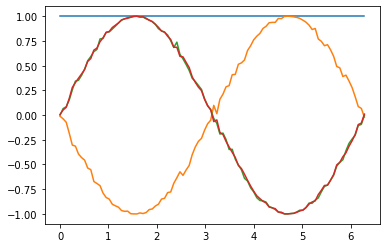

In [211]:
import matplotlib.pyplot as plt
plt.plot(parameters1,read_1_list, label = "line 1")
plt.plot(parameters1,read_2_list, label = "line 2")
plt.plot(parameters1,read_3_list, label = "line 3")
plt.plot(parameters1,energy_estimates, label = "line 4")

##### End Note

Ansatz is chosen by trial and error.    
some of ansatz results

| Ansatz  | Eigenvalue | 
|--------------|:------------|
|  (Rx)(cx01)(HI)| 0.415 |
|  (Ry)(cx01)(HI)       |      -0.015     | 
|(RyRy)(cx01)(HH)        |      -0.4622     | 
|  (RyRy)(cx01)(RyRy)(cx10)(RyRy)(cx01)(HH)       |      -0.85595     |  
|  (RyRy)(cx01)(RyRy)(cx10)(RyRy)(cx01)        |       -0.9135     |


other Ansatz with multiple parameter such as (U3I)(cx01)(HI) also perform similar, in this case it gave results was 0.0016  